# Homework 3

DUE DEC 1st at 11:59 PM


## Problem 1

In this problem, you will implement a simple feed-forward neural network using PyTorch, a straight-forward and simple-to-pickup framework for quickly prototyping deep learning model. 

PyTorch provides 2 powerful things. First, a nice data structure called Tensor (basically a matrix, similar to Numpy ndarray). Tensor is optimized for matrix calculation and can be loaded to a GPU. Tensor is also implemented so that it's easy to calculate and pass back chains of gradients, which is extremely useful for backpropagation on neural network. Second, a nice inner mechanism called Autograd that nicely map variables involved a chain of calculations and efficiently calculate their gradients via the chain rule when needed. Read more here: https://towardsdatascience.com/pytorch-autograd-understanding-the-heart-of-pytorchs-magic-2686cd94ec95  

You will train and evaluate the model on a simple dataset for classifying seeds. The dataset has 7 features and 3 labels. Refer to the example from the discussion session if needed. 

**In this problem, you are given a good amount of freedom in tweaking your choices in designing the network. As long as it's still a feed-forward network, it's fine. Accuracy does not matter as long as it's reasonable (like above 80%) but do try to achieve a high accuracy.**

(Optional): the dataset provided to you is very simple. Instead, you can challenge yourself by trying more difficult datasets. Some datasets that you can loaded directly using PyTorch:
- MNIST (Most famous dataset for getting into Deep Learning)
- Fashion-MNIST
- Kuzushiji-MNIST 

The datasets are available at https://pytorch.org/docs/stable/torchvision/datasets.html. You will get the same grade no matter what dataset you use. 

### Part a
Firstly, load and inspect the dataset from "seeds_dataset.csv". Split them into a train set (90%) and a test set (10%). You should be quite comfortable with these operations by now. 

In [1]:
import pandas as pd
import torch
import math
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv('seeds_dataset.csv')
df.head()
X = df.iloc[:,:-1].to_numpy(dtype = np.float32)
y = df.iloc[:,-1].to_numpy(dtype = np.float32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

### Part b 
Create a Python class for our neural network model. The network should have 1 input layer, at least 1 hidden layer, and 1 output layer. You are free to choose the size and the number of hidden layers (it may affect the performance so try tweaking around a bit), and the activation function (or no activation at all).

Some popular activation functions that you can try:
- Sigmoid (torch.sigmoid)
- ReLU (torch.relu)
- Tanh (torch.tanh)

In [2]:
import torch

class network(torch.nn.Module):
    
    # Create the network class by filling in this block of code

    def __init__(self):
        super(network, self).__init__()
        self.layer1 = torch.nn.Linear(in_features= 7, out_features= 40)
        self.layer2 = torch.nn.Linear(in_features= 40, out_features=40)
        self.outputlayer = torch.nn.Linear(in_features=40, out_features=7)

    def forward(self,x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.outputlayer(x)
        return x

### Part c 
Train the network using the train dataset. You are free to choose any suitable optimizer and loss function provided by PyTorch (or you can just use SGD optimizer and CrossEntropyLoss like we did in the discussion session for simplicity). After each epoch, record the current loss and the current accuracy. The current accuracy is obtained by evaluating the model on the train dataset. 

Some optimizers that you can try:
- SGD
- Adagrad
- Adam

https://pytorch.org/docs/stable/optim.html

In [3]:
LEARNING_RATE = 0.01
EPOCHS = 100
batch_size = 32

nn = network()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(nn.parameters(), lr = LEARNING_RATE)

nn.train()
training_size = len(X_train)
num_batches = math.ceil(training_size/batch_size)
plot_loss = []
plot_acc = []
for epoch in range(EPOCHS):
    
    for batch in range(num_batches):
        
        X_train_batch = torch.tensor(X_train[batch*batch_size:min(batch*batch_size+batch_size,training_size),:])
        y_train_batch = torch.tensor(y_train[batch*batch_size:min(batch*batch_size+batch_size,training_size)], dtype = torch.long)
        
        optimizer.zero_grad()

        output = nn(X_train_batch)

        loss = criterion(output, y_train_batch)
        #acc = np.sum(output == y_train_batch)/len(y_train_batch)
        loss.backward()

        optimizer.step()


    pred = torch.argmax(nn(torch.tensor(X_test)), dim=1).numpy()
    if (epoch % 5) == 0:
    #for epoch in range(EPOCHS):
        print("Epoch:", epoch, "Current loss: ", loss.item())
       
        plot_acc.append(np.sum(pred == y_test)/len(y_test))
        plot_loss.append(loss.item())
      

Epoch: 0 Current loss:  1.189551591873169
Epoch: 5 Current loss:  0.9720694422721863
Epoch: 10 Current loss:  0.8725441694259644
Epoch: 15 Current loss:  0.7863038778305054
Epoch: 20 Current loss:  0.7138602137565613
Epoch: 25 Current loss:  0.6549504995346069
Epoch: 30 Current loss:  0.6078721880912781
Epoch: 35 Current loss:  0.5697281360626221
Epoch: 40 Current loss:  0.539495587348938
Epoch: 45 Current loss:  0.5067779421806335
Epoch: 50 Current loss:  0.48116663098335266
Epoch: 55 Current loss:  0.4581988751888275
Epoch: 60 Current loss:  0.4395887553691864
Epoch: 65 Current loss:  0.4205898344516754
Epoch: 70 Current loss:  0.40116086602211
Epoch: 75 Current loss:  0.3863318860530853
Epoch: 80 Current loss:  0.36995813250541687
Epoch: 85 Current loss:  0.35275930166244507
Epoch: 90 Current loss:  0.3383108675479889
Epoch: 95 Current loss:  0.3221835494041443


Plot how the loss and the accuracy change over the epochs. 

Text(0, 0.5, 'Loss')

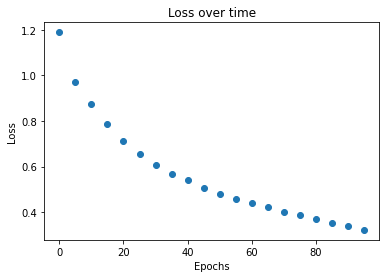

In [4]:


x = np.arange(0, 99, 5)
plt.scatter(x, plot_loss)
plt.title("Loss over time")
plt.xlabel("Epochs")
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

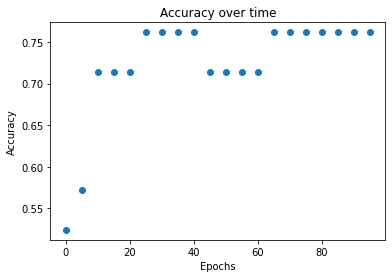

In [5]:

plt.scatter(x, plot_acc)
plt.title("Accuracy over time")
plt.xlabel("Epochs")
plt.ylabel('Accuracy')

### Part d 
Evaluate the model on the test dataset. Print out the accuracy. Does this accuracy agrees with the training accuracy showed on the plot? Why may they be different?

In [6]:
nn.eval()

pred = torch.argmax(nn(torch.tensor(X_test)), dim=1).numpy()

print("Accuracy: ", np.sum(pred == y_test)/len(y_test))

Accuracy:  0.7619047619047619


This accuracy matches the final accuracy on the graph. It's not unlikely for the testing accuracy to be lower than the training accuracy. This occurs when the model overfits on the training data and isn't as robust when used on the testing dataset. 

## Problem 2

If you haven't done so already, please read Chapter 2 (on fairness) of the textbook.

### Part a

Import the 'semi_synthetic.csv' dataset. This dataset is a modified version of the UCI Credit card dataset (details [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)). We added a new synthetic feature to this dataset called `LIMIT_BAL`. It is highly predictive for `SEX==2` but not at all for `SEX==1`. As it turns out, this causes issues with fairness where models rely too much on `LIMIT_BAL` and discriminate against `SEX==2`. We will try to mitigate this in terms of the fairness criterion 'Statistical Parity' as it's mentioned in the textbook.

In [7]:
import pandas as pd

df = pd.read_csv('semi_synthetic.csv')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0.897646,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,1.239472,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,-0.259719,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,-0.277865,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,-0.257674,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Extract features from the dataset (all columns except last) and call it `X`. Extract last column and call it `Y`. Also extract the `SEX` column and call this `SF` (for sensitive feature). Split all of these arrays data into train and test sets. You can use `sklearn.model_selection.train_test_split` and 20% ratio for the test dataset. Pass `stratify=Y` to `train_test_split` if you're using it. This ensures that both test and train datasets have the same ratio of 0/1 labels.

In [8]:
from sklearn.model_selection import train_test_split 
import numpy as np
import random
random.seed(2020)
np.random.seed(2020)

X = df.iloc[:,: -1]
y = df.iloc[:,-1]
SF = df.iloc[:,1]

X_train, X_test, y_train, y_test, SF_train, SF_test = train_test_split(X, y, SF, test_size = 0.2, stratify = y)

Use a random forest classifier (whichever hyperparameters you want, you may leave it default) and train it using the train dataset (only `X_train` and `Y_train`. We will not use `SF_train` yet.)

In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

### Part b

Now we will consider the 'statistical parity' fairness metric on the test dataset. This basically means we compare the selection rates (i.e. predicted labels being 1) conditioned on sex and look at their difference/ratio. To do this, print 5 things: 

1. Overall selection rate (what percent is predicted as 1)
2. Selection rate for `SEX==1`
3. Selection rate for `SEX==2`
4. Difference between 2. and 3.
5. Ratio of 2. and 3.

Note that we didn't use anything related to how accurate the model is.

In [10]:
y_pred = model.predict(X_test)
y = X_test.copy(deep = True)
y["y_pred"] = y_pred

ones = y[y_pred == 1]
sex_1 = len(ones[ones['SEX'] == 1])/len(y[y['SEX'] == 1])
sex_2 = len(ones[ones['SEX'] == 2])/len(y[y['SEX'] == 2])

print("1. Overall selection rate:", len(ones)/len(y_pred)*100, '%')
print("2. Selection rate for SEX = 1:", sex_1*100, "%")
print("3. Selection rate for SEX = 2:", sex_2*100, "%")
print("4. Difference between 2 and 3:", abs(sex_2 - sex_1) * 100, '%')
print('5. Ratio of 2 and 3:', sex_1/sex_2)

1. Overall selection rate: 15.25 %
2. Selection rate for SEX = 1: 13.17365269461078 %
3. Selection rate for SEX = 2: 16.57564172583288 %
4. Difference between 2 and 3: 3.4019890312220995 %
5. Ratio of 2 and 3: 0.7947597391707524


There is a new Python package called `fairlearn` that aims to help machine learning researchers use fairness techniques more easily. Go ahead and download this package (`pip install fairlearn` or `conda install fairlearn`). Note: the authors of `fairlearn` call 'statistical parity' from the textbook as 'demographic parity'.

We will use `selection_rate`, `demographic_parity_difference`, `demographic_parity_ratio` from `fairlearn.metrics` to calculate 1., 4. and 5. above. The way to use these functions is: first argument `Y_test`, second argument `Y_prediction`, and for `demographic_parity_difference` and `demographic_parity_ratio` you need to give a keyword argument for the 'sensitive feature' by `sensitive_features=SF_test`.

Use these three functions and confirm your earlier calculations for 1., 4. and 5.

In [11]:
from fairlearn.metrics import selection_rate, demographic_parity_difference, demographic_parity_ratio
one = selection_rate(y_test, y_pred)
four = demographic_parity_difference(y_test, y_pred, sensitive_features=SF_test)
five = demographic_parity_ratio(y_test, y_pred, sensitive_features= SF_test)

print("Selection rate:", one * 100, '%')
print("Demographic parity difference between SEX = 1 and SEX = 2:", four *100, '%')
print('Demographic parity ratio between SEX = 1 and SEX = 2:', five)

Selection rate: 15.25 %
Demographic parity difference between SEX = 1 and SEX = 2: 3.4019890312220995 %
Demographic parity ratio between SEX = 1 and SEX = 2: 0.7947597391707524


### Part c
### Mitigating Unfairness with Giving Weights to Datapoints

Now we are going to use the `GridSearch` function from `fairlearn.reductions` to try to mitigate this statistical parity discrepancy. This is one of the many ways to achieve this. What this function does is it gives higher weights to certain datapoints (determined by the sensitive feature) in order to change what the model learns. It automatically uses grid search to determine which weight should be given to `SEX==1` datapoints vs `SEX==2` datapoints (if you're interested you can read the source code). While it is called grid search, the space it searches is 1-dimensional. For our purposes, `GridSearch` takes four arguments: 

1. The model you defined above. This is a non-keyword argument.
2. Constraint. This needs to be an object defined by `fairlearn`, the class we will be using is `fairlearn.reductions.DemographicParity`. It corresponds to minimizing the difference in selection rates (4. from above). This is a non-keyword argument.
3. (Keyword argument) `grid_limit`. This determines the boundaries of the grid search. Basically, the `GridSearch` function will search the interval \[-`grid_limit`,`grid_limit`\] to find the weights. Choose this to be 0.8.
3. (Keyword argument) `grid_size`. This determines how many points there will be in the grid search. Choose this to be 21.

Just like `sklearn.model_selection.GridSearchCV` we have seen in HW1, `fairlearn.reductions.GridSearch` is also a wrapper, so you need to call `.fit()` on this wrapper (not the model directly). Training should be done in less than 5 minutes. In the end this wrapper will contain `grid_size` many models, each corresponding to a different weight for datapoints.

In [12]:
from fairlearn.reductions import GridSearch, DemographicParity
gridsearch_wrapper = GridSearch(RandomForestClassifier(), constraints = DemographicParity(), grid_limit = 0.8, grid_size = 21)
gridsearch_wrapper.fit(X_train, y_train, sensitive_features = SF_train)

The `GridSearch` wrapper object you trained has a field called `predictors_`. This gives a list of all the models trained in this grid search, which will be of size `grid_size`.

In [ ]:
predictions_sweep = [predictor.predict(X_test) for predictor in gridsearch_wrapper.predictors_] 
accuracy_sweep = [predictor.score(X_test, y_test) for predictor in gridsearch_wrapper.predictors_] 

Notice that `predictions_sweep` is a 21 element list. Each of these elements is a numpy array that contains the predictions (`Y_pred`) for `X_test` for that particular model. Use `demographic_parity_difference` like you did above to find the difference in selection rates for each of these models and store these 'fairness metrics' in a numpy array (it too will be size 21).

In [17]:
from sklearn.metrics import accuracy_score

fairness_metrics = []
accuracy_metrics = []
for i in predictions_sweep:
    fairness_metrics.append(demographic_parity_difference(y_test, i, sensitive_features=SF_test))

fairness_metrics

[0.8279628618241398,
 0.828782086291644,
 0.0333553070187938,
 0.03464826607999574,
 0.03463845500852861,
 0.03196353645210165,
 0.02970652282078584,
 0.03250968609710439,
 0.02994339011763475,
 0.03095346328486817,
 0.03177268775237227,
 0.0386621622947442,
 0.03554971667027185,
 0.0364873747862004,
 0.03294721316514976,
 0.02594911604582048,
 0.01774028598806132,
 0.005945275712131937,
 0.003961336903317486,
 0.1594756963407974,
 0.1567449481157837]

In [18]:
accuracy_sweep

[0.6428333333333334,
 0.6443333333333333,
 0.8555,
 0.8506666666666667,
 0.8553333333333333,
 0.8541666666666666,
 0.8578333333333333,
 0.8568333333333333,
 0.8561666666666666,
 0.8558333333333333,
 0.8556666666666667,
 0.8558333333333333,
 0.8578333333333333,
 0.8558333333333333,
 0.8593333333333333,
 0.8563333333333333,
 0.8561666666666666,
 0.854,
 0.8565,
 0.8415,
 0.8425]

Plot the accuracy vs difference in selection rates for all these models in a scatter plot.

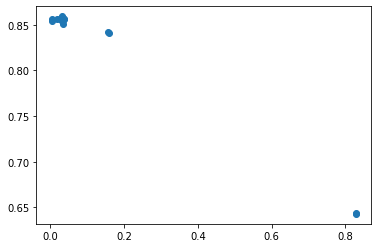

In [19]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(fairness_metrics, accuracy_sweep)
plt.show()

Text(0, 0.5, 'Accuracy')

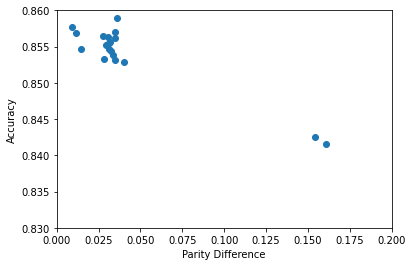

In [46]:
#zoom in ???
plt.scatter(fairness_metrics[2:], accuracy_sweep[2:])
axes = plt.gca()
axes.set_ylim(0.83, 0.86)
axes.set_xlim(0.0, 0.2)
plt.xlabel("Parity Difference")
plt.ylabel("Accuracy")

### Part d 

Now calculate the *pareto front*: go over each (accuracy, difference in selection rates) pair and compare it to every other pair. If you find the first pair to have lower accuracy and higher difference in selection rate, discard it.

In [24]:
points = np.array(list(zip(accuracy_sweep, fairness_metrics)))
count = 0

pareto_x = []
pareto_y = []

for x, y in points:
    for xi, yi in points:
       
        if ((x < xi) & (y > yi)):
            count = 1
            break
    if (count < 1):
        pareto_x.append(x)
        pareto_y.append(y)
    count = 0



* Plot the accuracy vs difference in selection rates for all the models the grid search in a scatter plot.
* On the same plot, plot the accuracy vs difference in selection rates for the points on the pareto front. Make these points red.

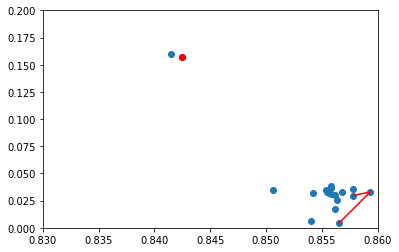

In [25]:

plt.figure()
plt.scatter(accuracy_sweep, fairness_metrics)
plt.scatter(x,y, color = 'r')
plt.plot(pareto_x, pareto_y, color = 'r')
axes = plt.gca()
axes.set_ylim(0.0, 0.2)
axes.set_xlim(0.83, 0.86)
#plt.legend()
plt.show()

Which one of these models would you choose to use? Why?

I would pick the point on the far right. It has the highest accuracy out of all the points, and it's fairness metric is only 0.025 higher than the point with the lowest fairness metric. The gain in accuracy of this point is more substantial than the loss in fairness. 

I would pick the point furthest left and down on the Pareto front. It has the lowest fairness metric and the second highest accuracy. The point with the highest accuracy has a much higher value on the fairness metric, and it's less than 1% more accurate than the other point.

## Problem 3

This problem builds on ideas from paper 2a in Module 1: “Against prediction: Sentencing, Policing, And Punishing In An Actuarial Age,” Chicago Public Law And Legal Theory Working Paper No. 94, Harcourt, 2005. 

Suppose we have two groups $A$ and $B$ of population sizes $n$ and $9n$. We find that under equal surveillance, group $A$’s offending rate is $2$ offenses per month per person and that of group $B$ is $1$ offense per person per month (See Figure on page 17 of the above paper). Equal surveillance means that out of a total of $10m$ monitors, $m$ monitors are assigned to group $A$ and $9m$ monitors are assigned to group $B$. The surveillance is $\frac{m}{n}$ per capita for both groups. So, under equal surveillance, the combined offending rate over both groups is $11n$ per month. 

Suppose we want to bring down the overall offending rate by increasing the monitors for group $A$. In order to do that we collected some data and found that we could model the rate of decrease in offenses for group $A$ by a function as follows:
	If we increase the per capita surveillance from $\frac{m}{n}$ to $\frac{m}{n} (1 + \delta_A)$, the offending rate declines to $2e^{- \alpha \delta_A}$. ($\alpha>0$)

Similarly, we modeled the rate of increase in offenses for group $B$ by a function under reduced surveillance as follows:
	If we decrease the per capita monitoring rate from $\frac{m}{n}$ to $\frac{m}{n} (1 - \delta_B)$, the offending rate rises to $e^{ \beta \delta_B}$. ($\beta>0$)

How would you distribute the monitors so that 

**a)** Both groups had the same offending rate?

**b)** The combined offending rate was minimized?


Consider 3 different scenarios when $\alpha > \beta$, $\alpha = \beta$, and $\alpha < \beta$. 

**c)** For each of the scenarios, which of the above solutions would you prefer and why?

**TIPS**:
- For **part a** and **part b**, answer by calculating $\delta_A$ and $\delta_B$.
- Try to set up equations from the given information. This problem mostly consists of algebra.
- If you do it correctly, **part c** should makes sense immediately.


![alt text](IMG_1414.jpg)

![alt text](IMG_1415.jpg)

When $\alpha = \beta $, $\delta_A $ and $\delta_B $ are the same for both setting the same offending rate and minimizing the offending rate: 

$\delta_A = \frac{9 ln(2)}{10\alpha} $
$\delta_B = \frac{ln(2)}{10\alpha} $

In this situation, we don't need to choose between the scenarios of A and B. 


When $\alpha > \beta $, the values of $\delta_A$ and $\delta_B $ are relatively unaffected for the same offending rate. If we rearrange the answers to part B so that the numerator is in the form of $ln(\frac{2 \alpha }{\beta}) $, the effects become more clear. Since this is greater than $ln(2)$, group A will be monitored at a higher rate. While the values from part B will lead to a lower rate of crime, it is not necessarily a fair choice. If our goals are to increase monitoring of group A in order to lower crime, using the values of B is the better choice. However, I believe using the values from part A is the fairest of the two presented. While overall crime will not be at the lowest possible, group A is not overly policed as we see described in the paper. Obviously, each of the choices has a different set of trade-offs, but I personally think the choice that maximizes fairness is the better choice to make.

When $\alpha < \beta $, $\delta_A$ and $\delta_B$ from B have smaller values. In this case, group A is monitored more heavily than group b. Once again, this is not the most fair choice, so once again I would use scenario A. 